In [63]:
import requests
import json
import geojson

import pandas as pd
import xarray as xr

In [64]:
token = requests.post("http://localhost:8000/access_token").json()['token']

In [65]:
## if you want to take the token out to external environment run command here and copy paste
token

'xxxxx'

In [66]:
### if working outside of ODP workspace, paste in token text below
#token = 'xxxx'

In [67]:
headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json"
}
base_url = "https://api.hubocean.earth"

In [68]:
dataset_collection_name = "ILIAD-Example-Data-Collection" # Use the existing name or make-your-own-computer-friendly-name
dataset_name = "ILIAD_demo_dataset2" # Use the existing name or make-your-own-computer-friendly-name

In [82]:
# Create data collection

endpoint = f"/catalog"
url = base_url + endpoint

body = {
    "kind": "catalog.hubocean.io/dataCollection",
    "version": "v1alpha1",
    "metadata": {
        "name": f"{dataset_collection_name}",
        "display_name": "ILIAD pilot data collection",
        "description": "Data for the ILIAD demo",
        "labels": {
            "hubocean.io/test": 'true'
        }
    },
    "spec": {
        "distribution": {
            "published_by": {
                "contact": "Whaley, Matthew <mail@address.earth>",
                "organisation": "HUB Ocean"
            },
            "published_date": "2019-06-19T06:00:00",
            "website": "https://hubocean.earth",
            "license": {
                "name": "propriatary",
                "full_text": "This is a very strict legal text describing the data license for this data collection. The lawyer would be proud.",
                "href": "www.license.com"
            }
        },
        "tags": ["test", "hubocean"]
    }
}

response = requests.post(url, json=body, headers=headers)

if response.status_code == 200:
    json_response = response.json()
else:
       print(f"Request failed with status code {response.status_code} - {response.text}")

Request failed with status code 409 - {"error": "Resource already exist: qualified_name=catalog.hubocean.io/dataCollection/ILIAD-Example-Data-Collection", "request_id": "deadcd97-18eb-4a3f-8cf7-5b664b2e67a6"}


In [83]:
## Check to see if the data collection exists

resource_group = "catalog.hubocean.io"
resource_type = "dataCollection"
endpoint = f"/catalog/{resource_group}/{resource_type}/{dataset_collection_name}"
url = base_url + endpoint

response = requests.get(url, headers=headers)

if response.status_code == 200:
    json_response = response.json()
else:
   print(f"Request failed with status code {response.status_code} - {response.text}")

In [84]:
json_response

{'kind': 'catalog.hubocean.io/dataCollection',
 'version': 'v1alpha1',
 'metadata': {'name': 'ILIAD-Example-Data-Collection',
  'display_name': 'ILIAD pilot data collection',
  'description': 'Data for the ILIAD demo',
  'uuid': '867d169c-e5e8-48a2-8e0b-386b329922ae',
  'labels': {'hubocean.io/test': 'true'},
  'owner': 'f8688118-f396-4882-9ca7-1727537f7efa'},
 'status': {'num_updates': 0,
  'created_time': '2023-12-05T12:45:46.531584',
  'created_by': 'f8688118-f396-4882-9ca7-1727537f7efa',
  'updated_time': '2023-12-05T12:45:46.531584',
  'updated_by': 'f8688118-f396-4882-9ca7-1727537f7efa',
  'deleted_time': None,
  'deleted_by': None},
 'spec': {'distribution': {'published_by': {'contact': 'Whaley, Matthew <mail@address.earth>',
    'organisation': 'HUB Ocean'},
   'published_date': '2019-06-19T06:00:00',
   'website': 'https://hubocean.earth',
   'license': {'name': 'propriatary',
    'href': 'www.license.com',
    'full_text': 'This is a very strict legal text describing the data

In [85]:
#CREATE dataset inside collection

endpoint = "/catalog"
url = base_url + endpoint

body = {
    "kind": "catalog.hubocean.io/dataset",
    "version": "v1alpha3",
    "metadata": {
        "name": f"{dataset_name}",
        "display_name": "ILIAD API case 3 result",
        "description": "Testing compute on ODP example file",
        "labels": {
            "hubocean.io/test": "true"
        }
    },
    "spec": {
        "data_collection": f"catalog.hubocean.io/dataCollection/{dataset_collection_name}",
        "storage_class": "registry.hubocean.io/storageClass/raw",
        "storage_controller": "registry.hubocean.io/storageController/storage-raw-cdffs",
        "maintainer": {
            "contact": "LastName, FirstName <mail@address.earth>",
            "organisation": "HUB Ocean"
        }
    }
}

response = requests.post(url, json=body, headers=headers)

if response.status_code == 200:
    json_response = response.json()
    print(json_response)

else:
    print(f"Request failed with status code {response.status_code} - {response.text}")


Request failed with status code 409 - {"error": "Resource already exist: qualified_name=catalog.hubocean.io/dataset/ILIAD_demo_dataset2", "request_id": "dac9aed1-6c2c-4769-aec9-ba10acda3ddd"}


In [86]:
# Request file metadata from specific  dataset 

kind = "catalog.hubocean.io/dataset"
endpoint = f"/catalog/{kind}/{dataset_name}"
url = base_url + endpoint

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data_json_response = response.json()
else:
    print(f"Request failed with status code {response.status_code} - {response.text}")
    
data_json_response

{'kind': 'catalog.hubocean.io/dataset',
 'version': 'v1alpha3',
 'metadata': {'name': 'ILIAD_demo_dataset2',
  'display_name': 'ILIAD API case 3 result',
  'description': 'Testing compute on ODP example file',
  'uuid': '651a151e-ce9e-495e-b836-5770292eb07a',
  'labels': {'hubocean.io/test': 'true'},
  'owner': 'f8688118-f396-4882-9ca7-1727537f7efa'},
 'status': {'num_updates': 0,
  'created_time': '2023-12-05T13:46:42.807015',
  'created_by': 'f8688118-f396-4882-9ca7-1727537f7efa',
  'updated_time': '2023-12-05T13:46:42.807015',
  'updated_by': 'f8688118-f396-4882-9ca7-1727537f7efa',
  'deleted_time': None,
  'deleted_by': None},
 'spec': {'storage_class': 'registry.hubocean.io/storageClass/raw',
  'storage_controller': 'registry.hubocean.io/storageController/storage-raw-cdffs',
  'data_collection': 'catalog.hubocean.io/dataCollection/ILIAD-Example-Data-Collection',
  'maintainer': {'contact': 'LastName, FirstName <mail@address.earth>',
   'organisation': 'HUB Ocean'},
  'citation': N

In [61]:
# DELETE SPECIFIC DATASET

dataset_name_del = "test-csv-upload-djUC060"
dataset_name_del = dataset_name

kind = "catalog.hubocean.io/dataset"
endpoint = f"/catalog/{kind}/{dataset_name_del}"
url = base_url + endpoint

response = requests.delete(url, headers=headers)

if response.status_code == 200:
    data_json_response = response.json()
else:
    print(f"Request failed with status code {response.status_code} - {response.text}")
    
data_json_response

{'status': 'OK'}

In [74]:
# List datasets within collection

endpoint = "/catalog/list"
url = base_url + endpoint

body = {
        "selectors": [
            {"kind": "catalog.hubocean.io/dataset"},
            {
                "path": {
                    "spec.data_collection": f"catalog.hubocean.io/dataCollection/{dataset_collection_name}"
                }
            }
        ]
    }

response = requests.post(url, json=body, headers=headers)

if response.status_code == 200:
    json_response = response.json()
else:
    print(f"Request failed with status code {response.status_code} - {response.text}")

In [75]:
#json_response
pd.json_normalize(json_response['results'])

,kind,version,metadata.name,metadata.display_name,metadata.description,metadata.uuid,metadata.labels.hubocean.io/test,metadata.owner,status.num_updates,status.created_time,...,spec.storage_class,spec.storage_controller,spec.data_collection,spec.maintainer.contact,spec.maintainer.organisation,spec.citation,spec.documentation,spec.attributes,spec.facets,spec.tags
0,catalog.hubocean.io/dataset,v1alpha3,ILIAD_demo_dataset2,ILIAD API case 3 result,Testing compute on ODP example file,651a151e-ce9e-495e-b836-5770292eb07a,true,f8688118-f396-4882-9ca7-1727537f7efa,0,2023-12-05T13:46:42.807015,...,registry.hubocean.io/storageClass/raw,registry.hubocean.io/storageController/storage...,catalog.hubocean.io/dataCollection/ILIAD-Examp...,"LastName, FirstName <mail@address.earth>",HUB Ocean,None,[],[],None,[]
1,catalog.hubocean.io/dataset,v1alpha3,ILIAD_demo_dataset,ILIAD GUI upload geotiff example,Testing GUIupload file,7abe1b5d-2d80-4df6-9c77-44b8eed4c95b,true,f8688118-f396-4882-9ca7-1727537f7efa,0,2023-12-05T12:57:26.844781,...,registry.hubocean.io/storageClass/raw,registry.hubocean.io/storageController/storage...,catalog.hubocean.io/dataCollection/ILIAD-Examp...,"LastName, FirstName <mail@address.earth>",HUB Ocean,None,[],[],None,[]


In [88]:
rawfilename = 'BottomT_2020-12_testsample.nc'
file_mimetype = 'application/x-netcdf'

In [89]:
#compare with input netcdf file
xr.open_dataset(rawfilename)

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 241)
Coordinates:
  * latitude   (latitude) float32 55.0 55.08 55.17 55.25 ... 69.83 69.92 70.0
  * longitude  (longitude) float32 0.0 0.08333 0.1667 0.25 ... 19.83 19.92 20.0
    time       datetime64[ns] ...
Data variables:
    bottomT    (latitude, longitude) float32 ...

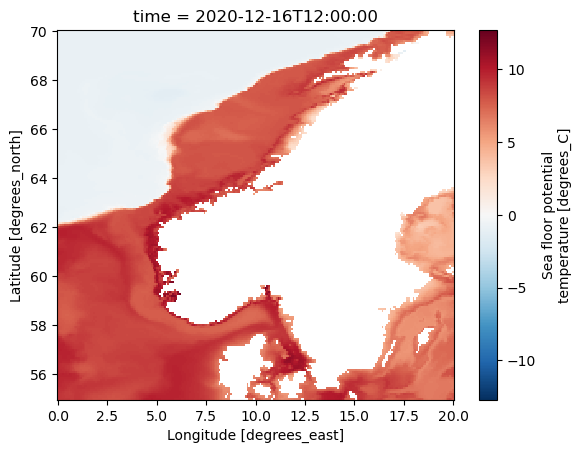

In [90]:
input = xr.open_dataset(rawfilename)
input.bottomT.plot()

In [77]:
# Create new FILE destination before uploading file
# No actual need to specify metadata or geo_location, this is optional

kind = "catalog.hubocean.io/dataset"
endpoint = f"/data/{kind}/{dataset_name}"
url = base_url + endpoint

payload = json.dumps({
  "name": rawfilename,
  "mime_type": file_mimetype,
  "metadata": {
    "metadatafield1": "metadatainput1",
    "metadatafield2": "metadatainput2"
  },
  "geo_location": {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [
            55.00,
            0.00
          ],
          [
            70.00,
            00.00
          ],
          [
            70.00,
            20.00
          ],
          [
            55.00,
            20.00
          ],
          [
            55.00,
            0.00
          ]
        ]
      ]
    },
    "properties": {
      "name": "Example Polygon",
      "description": "A simple polygon feature in GeoJSON format"
    }
  }
})

response = requests.post(url, headers=headers, data=payload)

if response.status_code == 200:
    json_response = response.json()
    print(json_response)

else:
    print(f"Request failed with status code {response.status_code} - {response.text}")

{'name': 'BottomT_2020-12_testsample.nc', 'mime_type': 'application/x-netcdf', 'dataset': '651a151e-ce9e-495e-b836-5770292eb07a', 'metadata': {'hubocean.io/app': 'odcat', 'hubocean.io/dataset': '651a151e-ce9e-495e-b836-5770292eb07a', 'metadatafield1': 'metadatainput1', 'metadatafield2': 'metadatainput2'}, 'geo_location': {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[55.0, 0.0], [70.0, 0.0], [70.0, 20.0], [55.0, 20.0], [55.0, 0.0]]]}, 'properties': {'name': 'Example Polygon', 'description': 'A simple polygon feature in GeoJSON format'}, 'id': None, 'bbox': None}, 'size_bytes': 0, 'checksum': 'd41d8cd98f00b204e9800998ecf8427e', 'created_time': '2023-12-05T13:47:26.490000', 'modified_time': '2023-12-05T13:47:26.683000', 'deleted_time': None}


In [19]:
# DELETE FILE LOCATION (SKIP IF HAPPY WITH FILE)

kind = "catalog.hubocean.io/dataset"
endpoint = f"/data/{kind}/{dataset_name}/{rawfilename}"
url = base_url + endpoint

response = requests.delete(url, headers=headers)

if response.status_code == 200:
    json_response = response.json()
    print(json_response)
else:
    print(f"Request failed with status code {response.status_code} - {response.text}")

{'OK': True}


In [91]:
# Upload datafile to file destination

kind = "catalog.hubocean.io/dataset"
endpoint = f"/data/{kind}/{dataset_name}/{rawfilename}"
url = base_url + endpoint

with open(rawfilename, "rb") as f:
    requests.patch(url, data=f, headers=headers)

In [92]:
# Request file metadata from specific RAW dataset 

kind = "catalog.hubocean.io/dataset"
endpoint = f"/data/{kind}/{dataset_name}/{rawfilename}/metadata"
url = base_url + endpoint

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data_json_response = response.json()
else:
    print(f"Request failed with status code {response.status_code} - {response.text}")
    
data_json_response

{'name': 'BottomT_2020-12_testsample.nc',
 'mime_type': 'application/x-netcdf',
 'dataset': '651a151e-ce9e-495e-b836-5770292eb07a',
 'metadata': {'hubocean.io/app': 'odcat',
  'hubocean.io/dataset': '651a151e-ce9e-495e-b836-5770292eb07a',
  'metadatafield1': 'metadatainput1',
  'metadatafield2': 'metadatainput2'},
 'geo_location': {'type': 'Feature',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[55.0, 0.0],
     [70.0, 0.0],
     [70.0, 20.0],
     [55.0, 20.0],
     [55.0, 0.0]]]},
  'properties': {'name': 'Example Polygon',
   'description': 'A simple polygon feature in GeoJSON format'},
  'id': None,
  'bbox': None},
 'size_bytes': 104097,
 'checksum': '17b4102d5bfee809ec5642115e0970ce',
 'created_time': '2023-12-05T13:47:26.490000',
 'modified_time': '2023-12-05T13:47:31.673000',
 'deleted_time': None}

In [27]:
# Download specific RAW data file that has just been uploaded. This can also be run in an external environment (but you will need to copy the authentification token from the top of the notebook)

kind = "catalog.hubocean.io/dataset"
endpoint = f"/data/{kind}/{dataset_name}/{rawfilename}"
url = base_url + endpoint

response = requests.get(url, headers=headers)

if response.status_code == 200:
    open("output.nc", "wb").write(response.content)
else:
    print(f"Request failed with status code {response.status_code} - {response.text}")

In [28]:
#verify output of netcdf file
xr.open_dataset('output.nc')

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 241)
Coordinates:
  * latitude   (latitude) float32 55.0 55.08 55.17 55.25 ... 69.83 69.92 70.0
  * longitude  (longitude) float32 0.0 0.08333 0.1667 0.25 ... 19.83 19.92 20.0
    time       datetime64[ns] ...
Data variables:
    bottomT    (latitude, longitude) float32 ...

In [29]:
#compare with input netcdf file
xr.open_dataset(rawfilename)

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 241)
Coordinates:
  * latitude   (latitude) float32 55.0 55.08 55.17 55.25 ... 69.83 69.92 70.0
  * longitude  (longitude) float32 0.0 0.08333 0.1667 0.25 ... 19.83 19.92 20.0
    time       datetime64[ns] ...
Data variables:
    bottomT    (latitude, longitude) float32 ...